## Imports for the program (Original program by Josh Lozjim and edited by Hayden Fuss, this version by Jeremy McKenzie. Ostensibly.)

In [6]:
%matplotlib inline
import matplotlib
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

## Declaration of important variables
emer_time_fmt declares the format for the time data
year_data declares an empty has, and the for loop creates further hashes (think: vectors) assigned to the keys of '2012' and '2013'

In [7]:
emer_time_fmt = "%m/%d/%Y %H:%M"

years = ('2012', '2013')

year_data = {}


This portion of the program builds the data list, organized by month, in a list called emergency. It runs through the list, pulling dates from the csv file, and then counts the number of times any particular month (and thereby the amount of calls in that month) comes up. If a month has not previously been encountered, it is added to the list and given a count of one. Otherwise, it's incremented by one.

In [8]:
for y in years:
    year_data[y] = {}   
    with open('2010-14 Full CAD, Jan-Jun ' + y + '.csv') as csvfile:
        emergency = csv.DictReader(csvfile)
        # for all the 911 calls the reader finds
        for e in emergency:
            date = time.strptime(e['ENTRY_DT'], emer_time_fmt)
            if date.tm_mon == 4:
                if not date.tm_mday in year_data[y].keys():
                    year_data[y][date.tm_mday] = 1
                else:
                    year_data[y][date.tm_mday] += 1

This section adjusts the data to plot-friendly tuples (again, like vectors) while the last line ensures that the bar will not be overrun by the data. It does this by finding the largest humber in either list, divides that by decimal 1000, rounds that up and converts to an integer, and mutiplies that by 1000.

In [9]:
ind=np.arange(len(year_data['2012']))
width=.35

tick_labels = []

counts_2012 = []

for apr_day in sorted(year_data['2012']):
    counts_2012.append(year_data['2012'][apr_day])
    tick_labels.append("4/" + str(apr_day))
    
counts_2013 = []

for apr_day in sorted(year_data['2013']):
    counts_2013.append(year_data['2013'][apr_day])

maxCount = int(math.ceil(max(counts_2012 + counts_2013) / 1000.0)) * 1000

This is the section that organizes the bar graph itself.
The last function puts a label with the exact number on the top of the bar graph

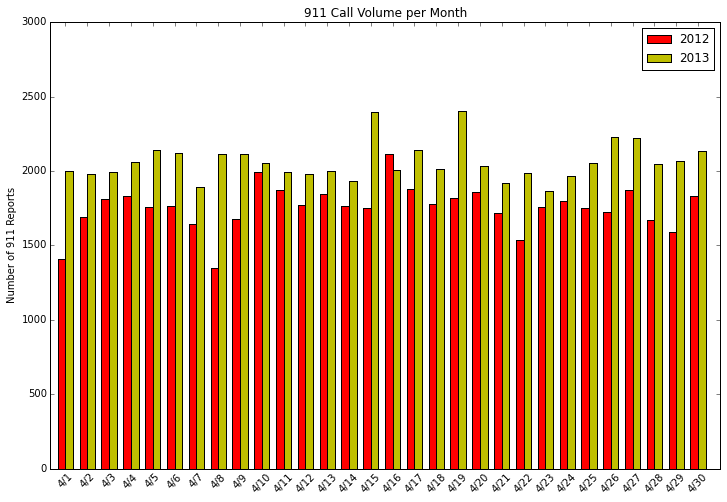

In [10]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, counts_2012, width, color='r')

rects2 = ax.bar(width+ind, counts_2013, width, color='y')

ax.set_xlim(-width, len(ind) + width)
ax.set_ylim(0, maxCount)
ax.set_ylabel('Number of 911 Reports')
ax.set_title('911 Call Volume per Month')
ax.set_xticks(ind+width)

tickNames = ax.set_xticklabels(tick_labels)
plt.setp(tickNames, rotation=45, fontsize=10)

ax.legend((rects1[0], rects2[0]), years)

def autolabel(rects):
# attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
            ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.savefig("911_per_day_apr.png", dpi=96)
plt.show()

###################################################